In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *

In [10]:
train_data = get_data()

temp = train_data["Avg_Temp"].to_numpy()
temp = x_train = standardize(temp, temp)
falls = train_data["Sum_Fall"].to_numpy()

temp = np.reshape(temp, (np.shape(temp)[0],1))
falls = np.reshape(falls, (np.shape(falls)[0],1))

x_train = np.concatenate((temp, falls), axis=1)
network = NeuralNetwork(x_train[0:7].T, x_train[1:8], 2)

y_train = x_train[1:, [0]]
print(y_train)

[[-1.64579918]
 [-0.82499079]
 [-0.85064105]
 ...
 [-0.19655936]
 [-0.29916041]
 [ 0.13689405]]


In [11]:
print(len(x_train))

17442


In [12]:
SIZE = len(x_train)-100
y_output = np.zeros(SIZE)
y_pred = np.zeros(SIZE)
for i in range(SIZE):
    network.train(x_train[i:i+7].T, y_train[i+7])
    y_output[i] = y_train[i+7]
    y_pred[i] = network.output[0]

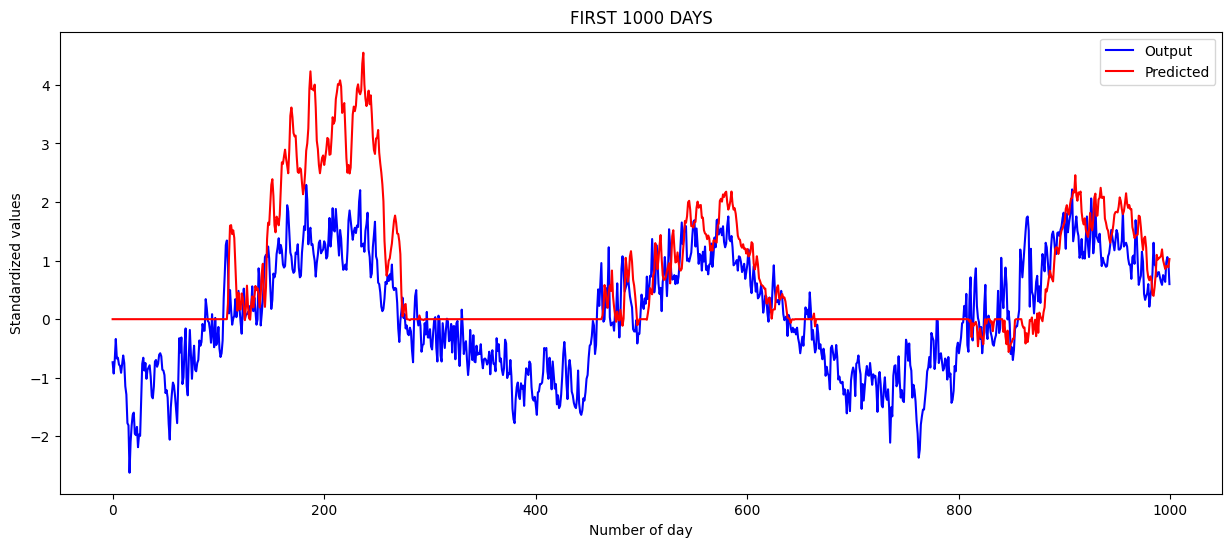

In [13]:
LENGHT = 1000

plt.figure(figsize=(15,6))
plt.title("FIRST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[:LENGHT], 'b', label="Output")
plt.plot(x, y_pred[:LENGHT], 'r', label="Predicted")
plt.legend()
plt.show()

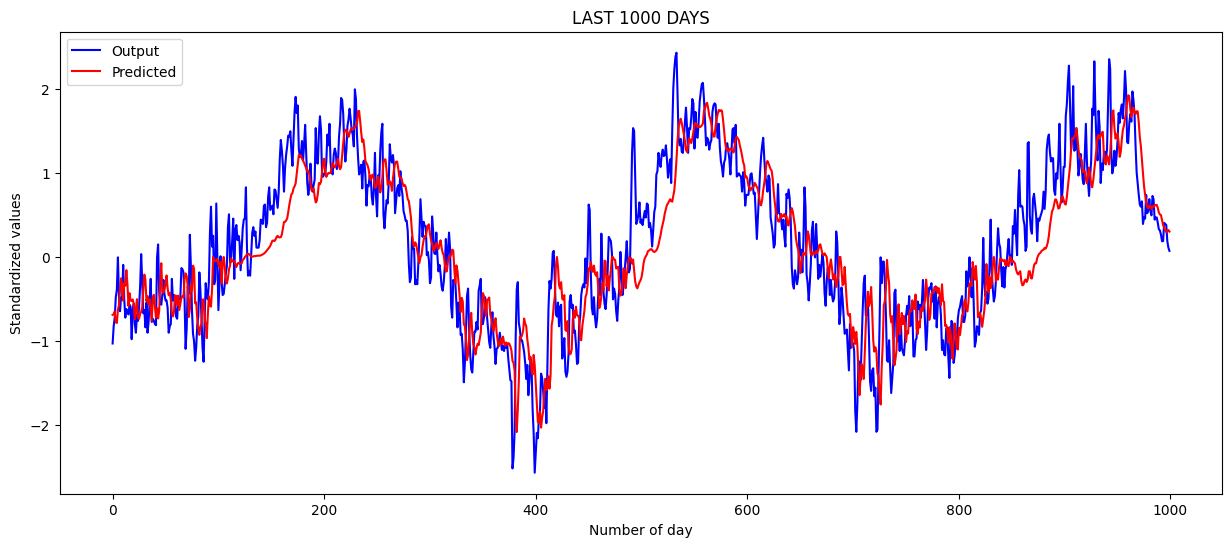

In [14]:
plt.figure(figsize=(15,6))
plt.title("LAST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[-LENGHT:], 'b', label="Output")
plt.plot(x, y_pred[-LENGHT:], 'r', label="Predicted")
plt.legend()
plt.show()

In [15]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.34226919937061406
MAE: 0.4395738280481324


# Predicting value

In [16]:
x_test = np.array([7,5,4,4,6,7,10])
x_test = np.reshape(x_test, (1, np.shape(x_test)[0]))
x_test = standardize(x_test, x_train_org)
network.predict(x_test)
print(unstandardize(network.output, x_train_org))

NameError: name 'x_train_org' is not defined